In [383]:
import json
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
import seaborn as sns

In [81]:
node_cor = json.loads('[{"x":-17.45907934333137,"y":8.585317613068582,"z":65.03617184369398},{"x":-7.812256956474688,"y":33.088484601318186,"z":47.104019208937004},{"x":-18.28032703588922,"y":-0.5614498840500656,"z":23.64376747343416},{"x":-65.77262826974187,"y":-2.4044580290387025,"z":7.258029547515405},{"x":11.956602897776541,"y":-14.736043167011179,"z":-25.331855368314155},{"x":-25.9443692000502,"y":-45.77162327480494,"z":18.248221523646624},{"x":-78.51038127830078,"y":-26.363433750469838,"z":-32.08593504456289},{"x":-70.68414799421205,"y":-37.854737661551205,"z":-4.565601457043428},{"x":-58.993775506285644,"y":-5.359475982908927,"z":-26.372157754085627},{"x":-3.6151033615877406,"y":-32.25528789090462,"z":-63.404944625778256},{"x":23.232417676844058,"y":-38.2197322332543,"z":-62.84638908252926},{"x":27.597206813247976,"y":-43.577949758611915,"z":-31.413810033374343},{"x":35.95418117439912,"y":-8.106528458055276,"z":-56.11131359721796},{"x":5.303008659937217,"y":-63.54778221549925,"z":-44.29175868549158},{"x":-1.5395265563949012,"y":-1.6743439809075904,"z":-58.392022596885},{"x":-21.456408936004177,"y":-79.28626210754223,"z":1.3637396606375076},{"x":-27.44176631030556,"y":-42.05802299542705,"z":-29.2161192009145},{"x":-52.86767684793617,"y":-69.64537227489157,"z":1.6585455519581385}]')

In [82]:
node_cor = pd.DataFrame(node_cor)

In [83]:
link = json.loads('[{"source":0,"mails":5,"weight":1,"target":1},{"source":0,"mails":6,"weight":1,"target":2},{"source":1,"mails":5,"weight":1,"target":2},{"source":2,"mails":25,"weight":2,"target":3},{"source":2,"mails":36,"weight":2,"target":4},{"source":2,"mails":53,"weight":3,"target":5},{"source":3,"mails":150,"weight":4,"target":6},{"source":3,"mails":213,"weight":5,"target":7},{"source":3,"mails":298,"weight":5,"target":8},{"source":4,"mails":345,"weight":6,"target":9},{"source":4,"mails":123,"weight":4,"target":10},{"source":4,"mails":212,"weight":5,"target":11},{"source":4,"mails":453,"weight":7,"target":12},{"source":4,"mails":156,"weight":4,"target":13},{"source":4,"mails":278,"weight":5,"target":14},{"source":5,"mails":300,"weight":5,"target":15},{"source":5,"mails":78,"weight":3,"target":16},{"source":5,"mails":256,"weight":5,"target":17},{"source":6,"mails":78,"weight":3,"target":7},{"source":6,"mails":145,"weight":4,"target":8},{"source":7,"mails":139,"weight":4,"target":8},{"source":9,"mails":34,"weight":2,"target":10},{"source":9,"mails":134,"weight":4,"target":11},{"source":9,"mails":546,"weight":7,"target":12},{"source":9,"mails":23,"weight":2,"target":13},{"source":9,"mails":145,"weight":4,"target":14},{"source":10,"mails":256,"weight":5,"target":11},{"source":10,"mails":222,"weight":5,"target":12},{"source":10,"mails":190,"weight":4,"target":13},{"source":10,"mails":56,"weight":3,"target":14},{"source":11,"mails":78,"weight":3,"target":12},{"source":11,"mails":112,"weight":4,"target":13},{"source":12,"mails":98,"weight":3,"target":14},{"source":15,"mails":88,"weight":3,"target":16},{"source":15,"mails":128,"weight":4,"target":17},{"source":16,"mails":238,"weight":5,"target":17},{"source":17,"mails":5,"weight":1,"target":7},{"source":16,"mails":15,"weight":2,"target":6},{"source":16,"mails":23,"weight":2,"target":7},{"source":16,"mails":54,"weight":3,"target":8},{"source":16,"mails":18,"weight":2,"target":9},{"source":16,"mails":23,"weight":2,"target":11},{"source":16,"mails":41,"weight":2,"target":13},{"source":16,"mails":13,"weight":2,"target":14},{"source":16,"mails":27,"weight":2,"target":10}]')

In [84]:
link = pd.DataFrame(link)

In [150]:
A = dict()
for a in link.source.unique():
    target_node = link[link.source==a].target.to_list()
    A[a]= target_node

In [151]:
B = dict()
for a in link.target.unique():
    source_node = link[link.target==a].source.to_list()
    B[a]= source_node

In [182]:
C = dict()
A_key = A.keys()
B_key = B.keys()
for node in range(17):
    A_bool = node in A_key
    B_bool = node in B_key
    if A_bool and B_bool:
        C[node]=A[node]+B[node]
    elif A_bool:
        C[node]=A[node]
    else:
        C[node]=B[node]

In [186]:
node_cor = np.array(node_cor)

In [330]:
D = dict()
for key in C.keys():
    D[key]=[]
for key, item in C.items():
    combination = list(combinations(C[key],2))
    print(combination)
    for points in combination:
        print(points[0],points[1],key)
        D[key].append(angle(node_cor[key],node_cor[points[0]],node_cor[points[1]]))

[(1, 2)]
1 2 0
[ -9.64682239 -24.50316699  17.93215263]
[ 0.82124769  9.1467675  41.39240437]
0.37770527299650974
1.1834795921574317
[(2, 0)]
2 0 1
[10.46807008 33.64993449 23.46025174]
[  9.64682239  24.50316699 -17.93215263]
0.37427853810426065
1.1871776851286728
[(3, 4), (3, 5), (3, 0), (3, 1), (4, 5), (4, 0), (4, 1), (5, 0), (5, 1), (0, 1)]
3 4 2
[47.49230123  1.84300814 16.38573793]
[-30.23692993  14.17459328  48.97562284]
-0.20381935566154052
1.7760539231218642
3 5 2
[47.49230123  1.84300814 16.38573793]
[ 7.66404216 45.21017339  5.39554595]
0.23079296267480504
1.3379037582319468
3 0 2
[47.49230123  1.84300814 16.38573793]
[ -0.82124769  -9.1467675  -41.39240437]
-0.3444022830176363
1.922398370601859
3 1 2
[47.49230123  1.84300814 16.38573793]
[-10.46807008 -33.64993449 -23.46025174]
-0.44334258914216274
2.030120678281292
4 5 2
[-30.23692993  14.17459328  48.97562284]
[ 7.66404216 45.21017339  5.39554595]
0.24602391539532678
1.3222203909643393
4 0 2
[-30.23692993  14.17459328  48

In [324]:
def angle (x,y,z):
    line1 = x-y
    line2 = x-z
    print(line1)
    print(line2)
    line1_norm = np.linalg.norm(line1)
    line2_norm = np.linalg.norm(line2)
    dot_line = np.dot(line1,line2)
    cosA = dot_line/(line1_norm*line2_norm)
    print(cosA)
    A = np.arccos(cosA)
    print(A)
    angle = A*360/2/np.pi
    return angle

In [369]:
Angles=[]
for value in D.values():
    Angles.append(value)
Angles = np.concatenate(list(D.values()))

In [371]:
Angles.mean()

81.47041445912971

In [372]:
Angles.std()

34.923262213983215

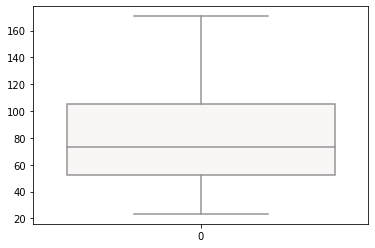

In [384]:
sns.boxplot(data=Angles,
            whis="range", palette="vlag")